In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [11]:
# Initialize an empty list to store rows
data = []

# Open the file and read it line by line
with open('books.csv', 'r') as file:
    lines = file.readlines()
    # Skip the first line since it contains column headers
    for line in lines[1:]:
        try:
            # Split the line into values and create a dictionary
            values = line.strip().split(',')
            row = {
                'bookID': values[0],
                'title': values[1],
                'authors': values[2],
                'average_rating': values[3],
                'isbn': values[4],
                'isbn13': values[5],
                'language_code': values[6],
                'num_pages': values[7],
                'ratings_count': values[8],
                'text_reviews_count': values[9],
                'publication_date': values[10],
                'publisher': values[11]
            }
            # Append the dictionary to the list
            data.append(row)
        except Exception as e:
            # If there's an error, print it
            print(f"Error processing line: {line}")
            print(e)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

  bookID                                              title  \
0      1  Harry Potter and the Half-Blood Prince (Harry ...   
1      2  Harry Potter and the Order of the Phoenix (Har...   
2      4  Harry Potter and the Chamber of Secrets (Harry...   
3      5  Harry Potter and the Prisoner of Azkaban (Harr...   
4      8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré           4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré           4.49  0439358078  9780439358071   
2                J.K. Rowling           4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré           4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré           4.78  0439682584  9780439682589   

  language_code num_pages ratings_count text_reviews_count publication_date  \
0           eng       652       2095690              27591        9/16/2006   
1           

In [12]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [19]:
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')

In [23]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/nj/8hybx2l51w30hyn2bc25j_680000gn/T/ipykernel_14781/1360376974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="title", data=data, palette='inferno')


<Axes: xlabel='average_rating', ylabel='title'>

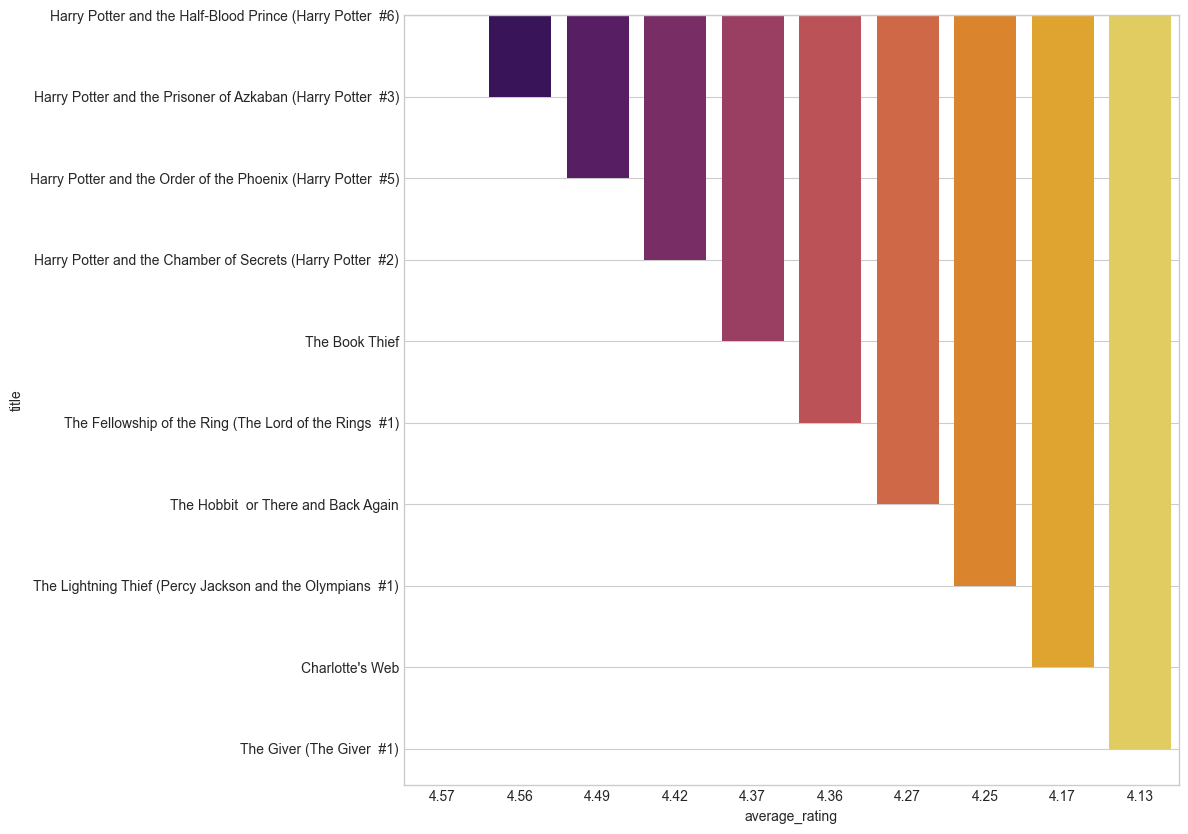

In [25]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

## The results above show us the top 10 books in our data. We saw that the max score in our data was 5.0 but we don’t see any books in the above result with a score of 5.0. Indeed, we have filtered these books according to the number of notes. We’ve made sure that all of the books we have in the above results have a decent rating. There may be books in the data that may have only 1 or 2 notes may be rated 5.0. We want to avoid such books, which is why we used this type of filtering.

/var/folders/nj/8hybx2l51w30hyn2bc25j_680000gn/T/ipykernel_14781/3203165989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='title', y='authors', data=most_books, palette='inferno')


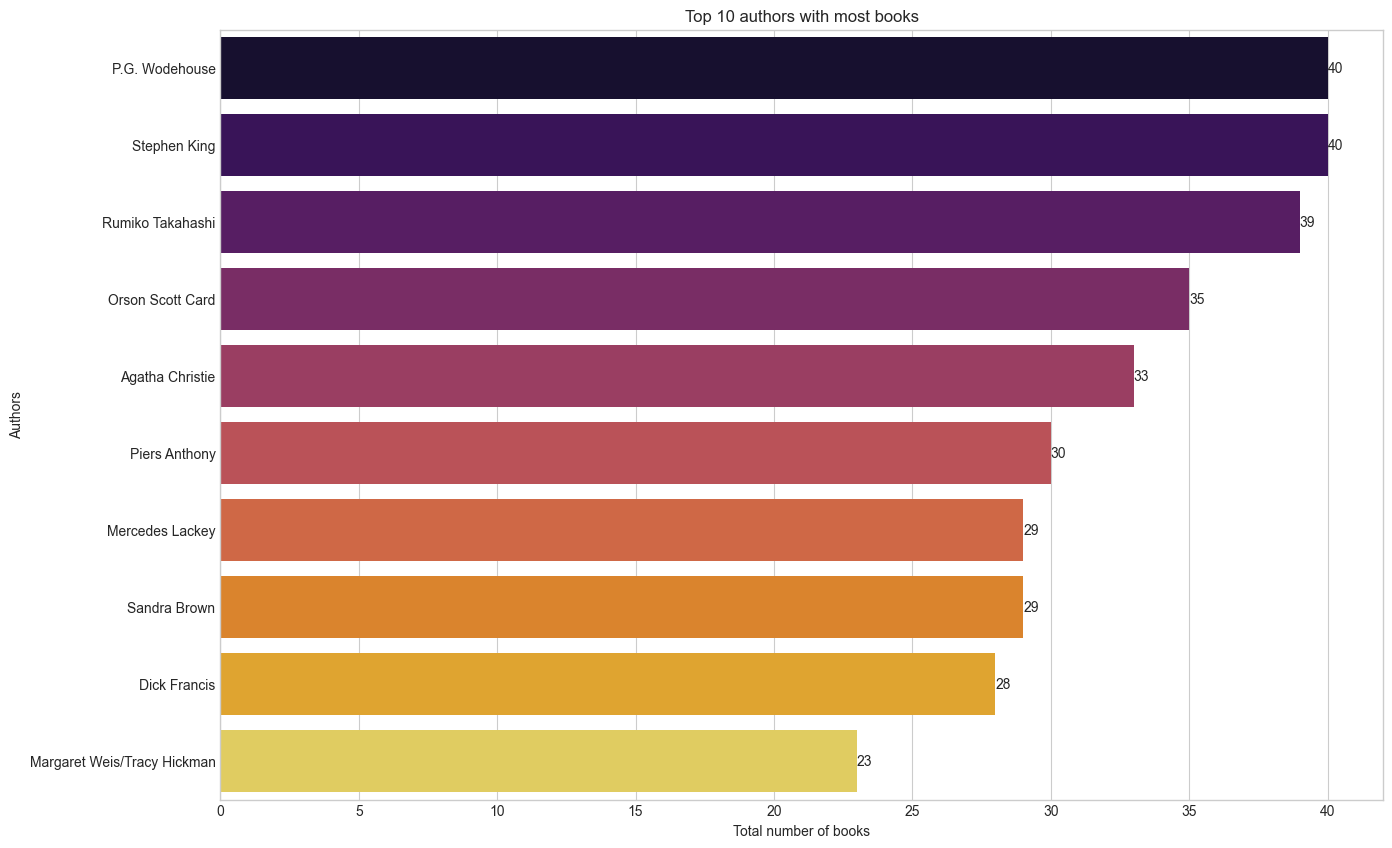

In [29]:

plt.figure(figsize=(15,10))
ax = sns.barplot(x='title', y='authors', data=most_books, palette='inferno')

# Add annotations
for index, value in enumerate(most_books['title']):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10)

ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
ax.set_ylabel("Authors")
plt.show()


/var/folders/nj/8hybx2l51w30hyn2bc25j_680000gn/T/ipykernel_14781/2467708603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='inferno')


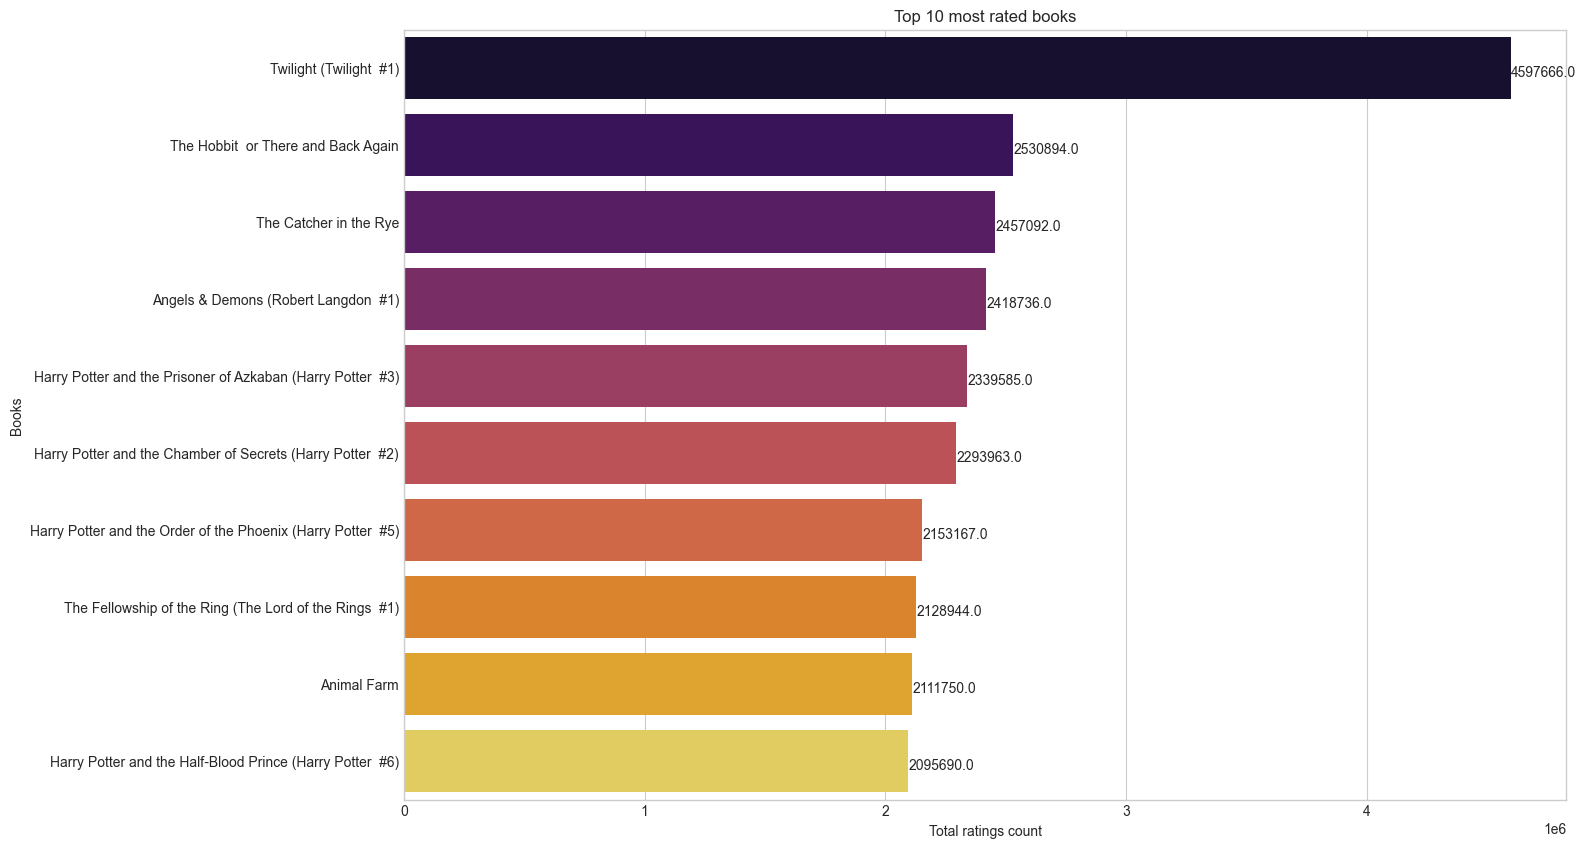

In [31]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='inferno')

# Add labels to each bar
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=10)

ax.set_title("Top 10 most rated books")
ax.set_xlabel("Total ratings count")
ax.set_ylabel("Books")
plt.show()

/var/folders/nj/8hybx2l51w30hyn2bc25j_680000gn/T/ipykernel_14781/3161507031.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'], ax=ax)


<Axes: xlabel='average_rating', ylabel='Density'>

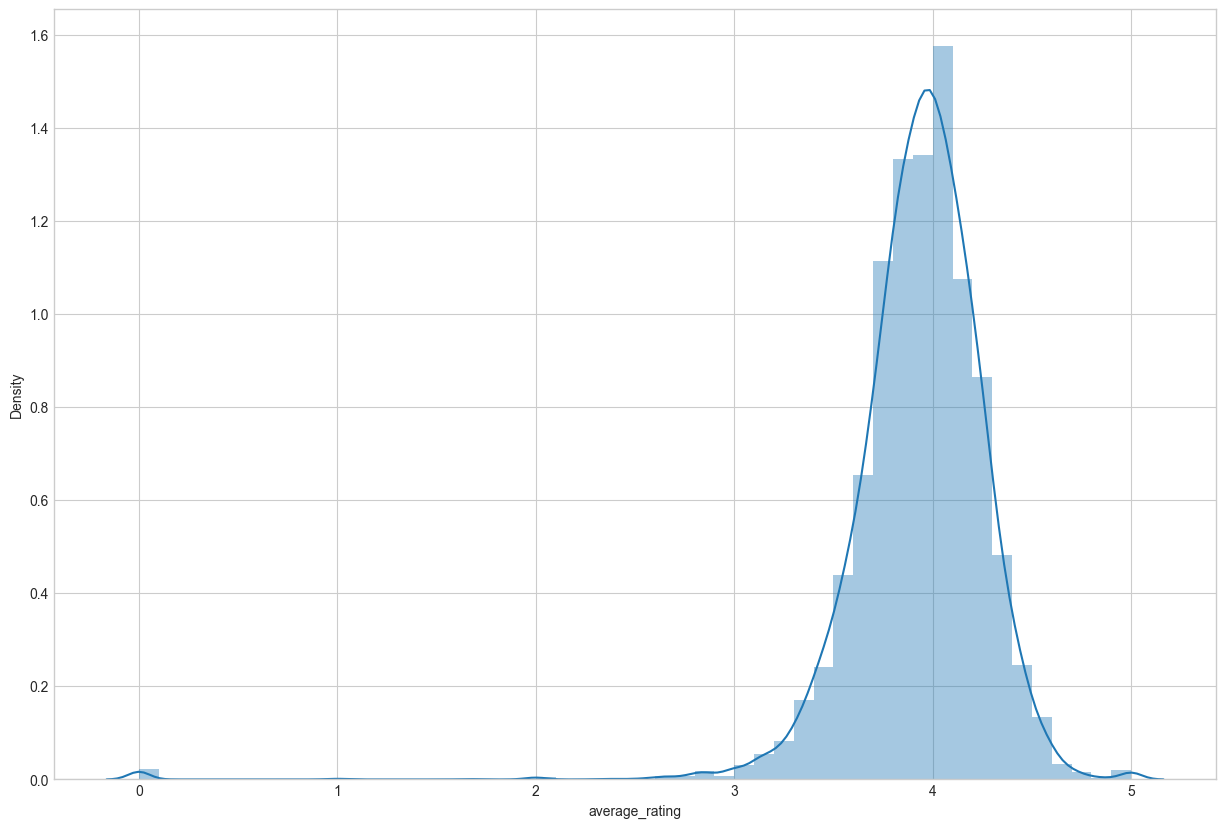

In [33]:
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

# Drop rows with NaN values in the 'average_rating' column
df = df.dropna(subset=['average_rating'])

# Convert the 'average_rating' column to float
df['average_rating'] = df['average_rating'].astype(float)

# Now you can proceed with plotting the distribution
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'], ax=ax)

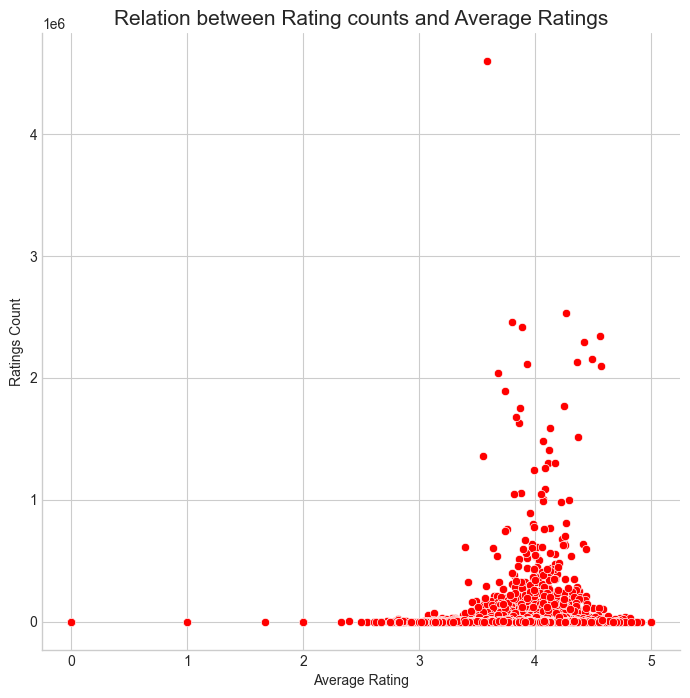

In [34]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [37]:
df2 = df.copy()

In [38]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [39]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [40]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [48]:

min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [49]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [50]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

In [55]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harrius Potter et Philosophi Lapis',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 "Blue Shoes and Happiness (No. 1 Ladies' Detective Agency #7)"]